In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [6]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")
data.head(17000)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [130]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [7]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

Обработка пропусков в данных 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

In [21]:
data_new_3 = data.fillna(0)
data_new_3.head(50)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,0,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,0,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,1934.0,Nov-61,1961.0


1.2. "Внедрение значений" - импьютация (imputation) 1.2.1. Обработка пропусков в числовых данных

In [131]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096.
Колонка Year. Тип данных float64. Количество пустых значений 815.


In [132]:
data_num = data[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
5,2255.0,1961.0
6,2072.0,1961.0
7,2017.0,1962.0
8,1955.0,1963.0
9,1934.0,1961.0


In [68]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['Year'].isnull()]


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
12,7823,Namor McKenzie (Earth-616),\/Namor_McKenzie_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Male Characters,NaN,Living Characters,1528.0,NaN,NaN
38,1677,Rogue (Anna Marie) (Earth-616),\/Rogue_(Anna_Marie)_(Earth-616),Secret Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,850.0,NaN,NaN
80,67048,Blaine Colt (Earth-616),\/Blaine_Colt_(Earth-616),Public Identity,NaN,Blue Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,429.0,NaN,NaN
114,37751,Monica Rambeau (Earth-616),\/Monica_Rambeau_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,327.0,NaN,NaN
259,25255,James Bradley (Earth-616),\/James_Bradley_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,158.0,NaN,NaN
310,535259,Steel (Earth-616),\/Steel_(Earth-616),Public Identity,Good Characters,NaN,White Hair,Male Characters,NaN,Living Characters,134.0,NaN,NaN
413,626857,Howard Hanover (Earth-616),\/Howard_Hanover_(Earth-616),Public Identity,NaN,NaN,Black Hair,Male Characters,NaN,Living Characters,100.0,NaN,NaN
683,13066,Fen (Earth-616),\/Fen_(Earth-616),No Dual Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,55.0,NaN,NaN
789,103136,Thakorr (Earth-616),\/Thakorr_(Earth-616),No Dual Identity,Bad Characters,NaN,No Hair,Male Characters,NaN,Deceased Characters,48.0,NaN,NaN
854,30883,Brightwind (Earth-616),\/Brightwind_(Earth-616),NaN,NaN,Red Eyes,Black Hair,Male Characters,NaN,Living Characters,44.0,NaN,NaN


In [75]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([   12,    38,    80,   114,   259,   310,   413,   683,   789,
              854,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=815)

In [76]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
12,7823,Namor McKenzie (Earth-616),\/Namor_McKenzie_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Male Characters,NaN,Living Characters,1528.0,NaN,NaN
38,1677,Rogue (Anna Marie) (Earth-616),\/Rogue_(Anna_Marie)_(Earth-616),Secret Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,850.0,NaN,NaN
80,67048,Blaine Colt (Earth-616),\/Blaine_Colt_(Earth-616),Public Identity,NaN,Blue Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,429.0,NaN,NaN
114,37751,Monica Rambeau (Earth-616),\/Monica_Rambeau_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,327.0,NaN,NaN
259,25255,James Bradley (Earth-616),\/James_Bradley_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,158.0,NaN,NaN
310,535259,Steel (Earth-616),\/Steel_(Earth-616),Public Identity,Good Characters,NaN,White Hair,Male Characters,NaN,Living Characters,134.0,NaN,NaN
413,626857,Howard Hanover (Earth-616),\/Howard_Hanover_(Earth-616),Public Identity,NaN,NaN,Black Hair,Male Characters,NaN,Living Characters,100.0,NaN,NaN
683,13066,Fen (Earth-616),\/Fen_(Earth-616),No Dual Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,55.0,NaN,NaN
789,103136,Thakorr (Earth-616),\/Thakorr_(Earth-616),No Dual Identity,Bad Characters,NaN,No Hair,Male Characters,NaN,Deceased Characters,48.0,NaN,NaN
854,30883,Brightwind (Earth-616),\/Brightwind_(Earth-616),NaN,NaN,Red Eyes,Black Hair,Male Characters,NaN,Living Characters,44.0,NaN,NaN


In [82]:
data[data['Year'].isnull()]
# Сохраняем индексы
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([   12,    38,    80,   114,   259,   310,   413,   683,   789,
              854,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=815)

In [83]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Year']

12      NaN
38      NaN
80      NaN
114     NaN
259     NaN
310     NaN
413     NaN
683     NaN
789     NaN
854     NaN
997     NaN
1118    NaN
1158    NaN
1316    NaN
1454    NaN
1564    NaN
1565    NaN
1845    NaN
1937    NaN
2033    NaN
2147    NaN
2148    NaN
2398    NaN
2399    NaN
2549    NaN
2727    NaN
2728    NaN
2909    NaN
2910    NaN
2911    NaN
         ..
16346   NaN
16347   NaN
16348   NaN
16349   NaN
16350   NaN
16351   NaN
16352   NaN
16353   NaN
16354   NaN
16355   NaN
16356   NaN
16357   NaN
16358   NaN
16359   NaN
16360   NaN
16361   NaN
16362   NaN
16363   NaN
16364   NaN
16365   NaN
16366   NaN
16367   NaN
16368   NaN
16369   NaN
16370   NaN
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: Year, Length: 815, dtype: float64

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [96]:
data[['Year']].describe()

,Year
count,15561.000000
mean,1984.951803
std,19.663571
min,1939.000000
25%,1974.000000
50%,1990.000000
75%,2000.000000
max,2013.000000


In [105]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096.
Колонка Year. Тип данных float64. Количество пустых значений 815.


In [107]:
# Фильтр по пустым значениям поля Year 
data[data['Year'].isnull()]
# Сохраняем индексы
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([   12,    38,    80,   114,   259,   310,   413,   683,   789,
              854,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=815)

In [116]:
for rows in flt_index:
  data.Year[rows]=data.Year.median()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.2.2. Обработка пропусков в категориальных данных

In [208]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count,temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


In [209]:
data_num = data[cat_cols]
data_num

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,FIRST APPEARANCE
0,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,Aug-62
1,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,Mar-41
2,Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,Oct-74
3,Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,Mar-63
4,No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,Nov-50
5,Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,Nov-61
6,Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,Nov-61
7,Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,May-62
8,Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,Sep-63
9,Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,Nov-61


In [198]:
# Фильтр по пустым значениям поля Year 
data[data['HAIR'].isnull()]
# Сохраняем индексы
flt_index = data[data['HAIR'].isnull()].index
flt_index

Int64Index([], dtype='int64')

In [212]:
data[['HAIR']].describe()

,HAIR
count,16376
unique,25
top,Purple Hair
freq,4311


In [211]:
MaxPassEmbarked = data.groupby('HAIR').count()['name']
data.HAIR[data.HAIR.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.median()].index[0]

data[data[col].isnull()].shape[0]

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


815

Преобразование категориальных признаков в числовые

In [182]:
data.ALIGN.replace({'Good Characters':'1','Bad Characters':'0','Neutral Characters':'2'},inplace=True)
data.head(50)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,1,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,1,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,2,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,1,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,1,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,1,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,1,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,1,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,2,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,1,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


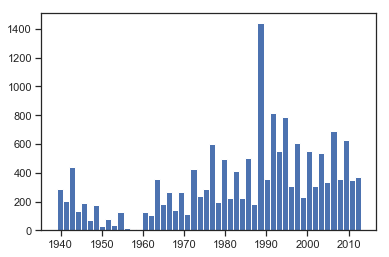

In [124]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])
plt.hist(data['Year'], 50)
plt.show()

Масштабирование данных на основе Z-оценки

c:\program files\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


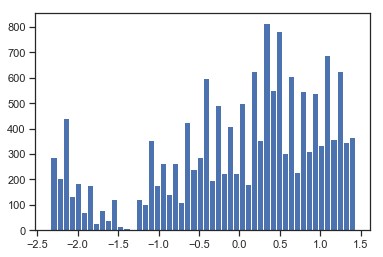

In [53]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Year']])
plt.hist(sc2_data, 50)
plt.show()

In [120]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Year']])

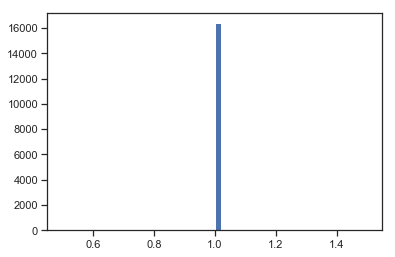

In [121]:
plt.hist(sc3_data, 50)
plt.show()

In [213]:
data.head(17000)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0
